# HW 3

## Problem 1

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
Omega_m0 = .3
Omega_lambda = .7

def omega_m(z):
    return (Omega_m0*(1+z)**3) / (Omega_m0*(1+z)**3 + Omega_lambda)

def delta_vir(z):
    return 18*np.pi**2 + 82*(omega_m(z)-1) - 39*(omega_m(z)-1)**2

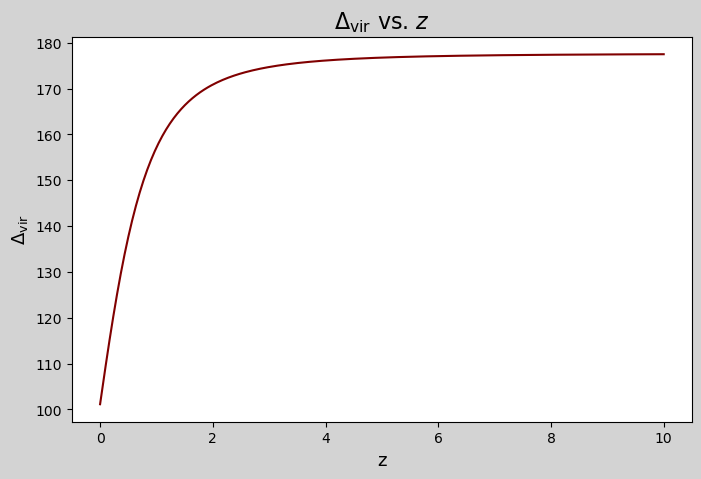

In [3]:
zs = np.linspace(0,10,300)
delta_virs = delta_vir(zs)

fig,ax = plt.subplots(1, figsize=(8,5))
fig.set_facecolor('lightgray')
ax.set_title("$\Delta_{\mathrm{vir}}$ vs. $z$", fontsize=16)
ax.set_xlabel('z', fontsize=13)
ax.set_ylabel("$\Delta_{\mathrm{vir}}$", fontsize=13)
ax.plot(zs, delta_virs, c="maroon")

In [ ]:
h = .7 #
H_0 = 100*h #km s^-1 Mpc^-1
H_0 = H_0 / 3.09e19 # s^-1
G = 6.67*10**-8 # cm^3 g^-1 s^-2
M = 1e12 * 1.989e33 # g

def rho_crit(z):
    return 3 * H_0**2 * (Omega_m0*(1+z)**3 + Omega_lambda)/(8*np.pi*G)

def r_vir(M, z):
    return ((.75*M) / (rho_crit(z)*delta_vir(z))*np.pi*omega_m(z))**(1/3)

z	r_vir
0	1.15e+24
1	9.33e+23
3	5.21e+23
6	3.02e+23
10	1.93e+23


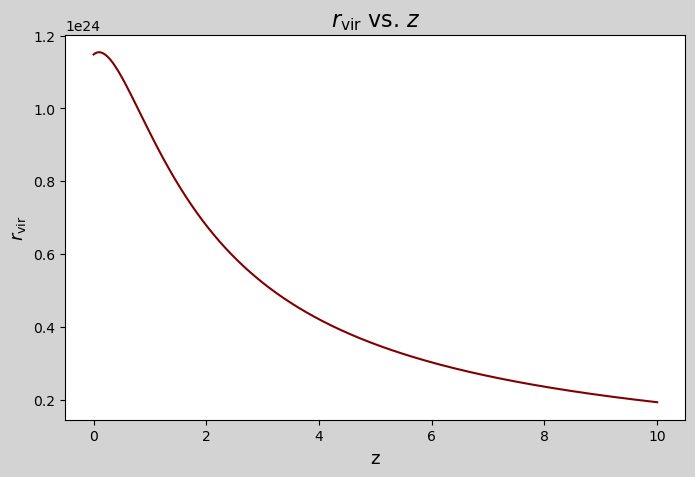

In [ ]:
r_virs = r_vir(M, zs)

fig,ax = plt.subplots(1, figsize=(8,5))
fig.set_facecolor('lightgray')
ax.set_title("$r_{\mathrm{vir}}$ vs. $z$", fontsize=16)
ax.set_xlabel('z', fontsize=13)
ax.set_ylabel("$r_{\mathrm{vir}}$", fontsize=13)
ax.plot(zs, r_virs, c="maroon")

notable_zs = [0,1,3,6,10]
print("z\tr_vir")
for z in notable_zs:
    print(f"{z}\t{r_vir(M,z):.2e}")

## Problem 2

In [18]:
from colossus.cosmology import cosmology
from colossus.halo import concentration
cosmo = cosmology.setCosmology('planck15')

In [27]:
def rho(r, z=0, M=M):
    c_vir = concentration.concentration(M=M/1.989e33, z=z, mdef="vir", model="duffy08")
    denom = 4 * np.pi * (r_vir(M,z)/c_vir)**3 * (np.log(1+c_vir) - c_vir/(1+c_vir))
    denom *= (c_vir/r_vir(M,z)) * r * (1+(c_vir/r_vir(M,z))*r)**2

    return M / denom

/var/folders/vw/19_m05lx64s_j4tk4nfr1zyc0000gn/T/ipykernel_82231/780500882.py:6: RuntimeWarning: divide by zero encountered in divide
  return M / denom
/opt/miniconda3/envs/astro/lib/python3.11/site-packages/colossus/halo/concentration.py:442: UserWarning: Some masses or redshifts are outside the validity of the concentration model.
  warnings.warn('Some masses or redshifts are outside the validity of the concentration model.')


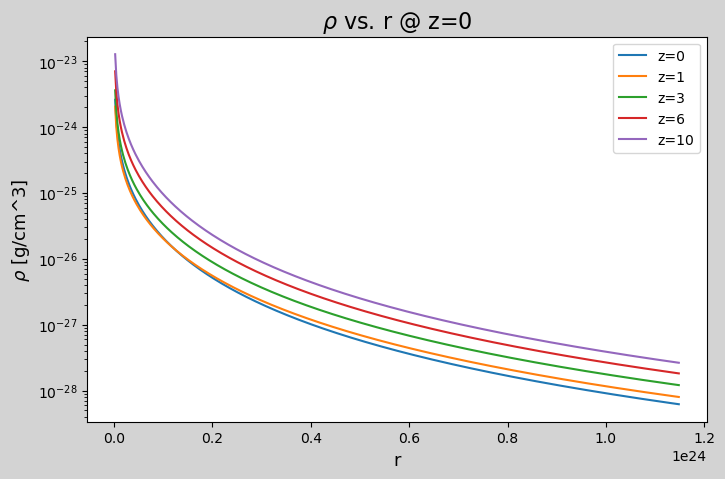

In [ ]:
fig,ax = plt.subplots(1, figsize=(8,5))
fig.set_facecolor('lightgray')
ax.set_title(r"$\rho$ vs. r @ z=0", fontsize=16)
ax.set_xlabel('r', fontsize=13)
ax.set_ylabel(r"$\rho$ [g/cm^3]", fontsize=13)
ax.set_yscale('log')

rs = np.linspace(0, r_vir(M,0), 500)

for z in notable_zs:
    rhos = rho(rs, z=z)
    ax.plot(rs, rhos, label=f"z={z}")

ax.legend()